importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

#metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report

In [ ]:
#load dataset
df=pd.read_csv('Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


Statistics of dataset

In [ ]:
#No.of rows and columns
df.shape

(4653, 9)

In [ ]:
#column names
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [ ]:
#summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
#checking the missing values
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

No null values present in the dataset

In [ ]:
#descriptive statistics
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


Exploratory Data Analysis

In [ ]:
#Count of Employees
# Education Level
df['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [ ]:
edu=df['Education'].value_counts().reset_index()
edu

,index,Education
0,Bachelors,3601
1,Masters,873
2,PHD,179


Observations:
1. Most of the Employee have "Bachelors" degree
2. Very less Employee have "PHD" degree

Text(0, 0.5, 'Number of Joinees')

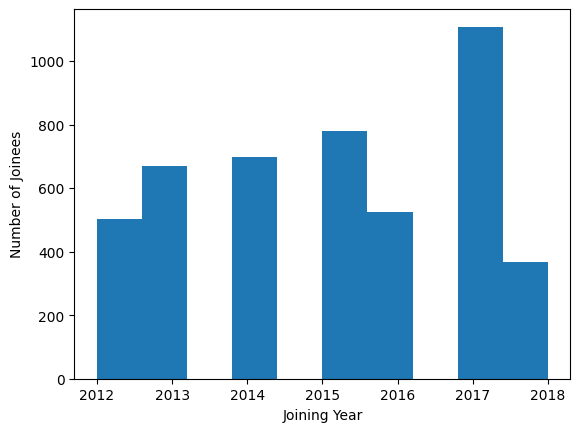

In [ ]:
#So here we now check the histplot of the dataset of the Joining Year column to see how briefly which
#year has highest amount of recruitments.

plt.hist(x=df['JoiningYear'])
plt.xlabel("Joining Year")
plt.ylabel("Number of Joinees")

Text(0, 0.5, 'Number of Holders for that degree')

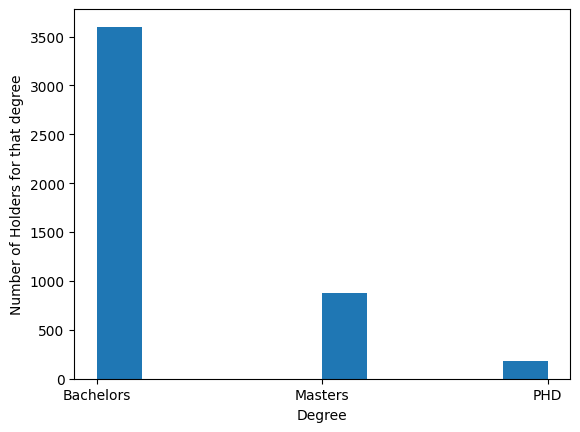

In [ ]:
#what kind of education background people come from
plt.hist(x=df['Education'])
plt.xlabel("Degree")
plt.ylabel("Number of Holders for that degree")

Text(0.5, 1.0, 'Diagram from Degree Convention')

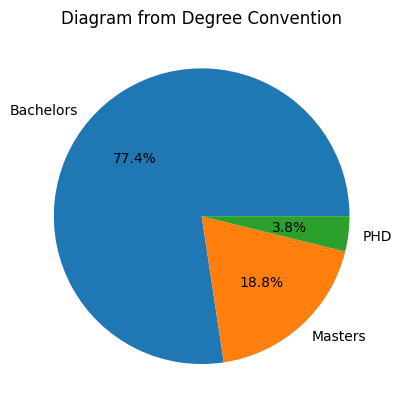

In [ ]:
#Pie plot

plt.pie(x=df['Education'].value_counts(), labels = df['Education'].value_counts().index, autopct = '%1.1f%%')
plt.title("Diagram from Degree Convention")

Text(0.5, 1.0, 'New Joiners across different cities')

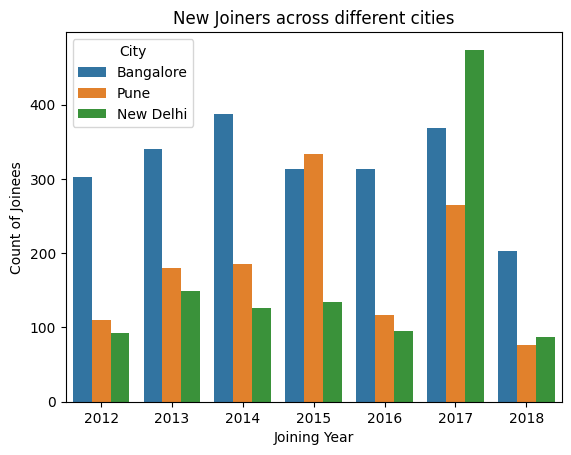

In [ ]:
#How does the length of service (Joining Year) vary across different cities?

sns.countplot(x='JoiningYear',hue='City',data=df)
plt.xlabel("Joining Year")
plt.ylabel("Count of Joinees")
plt.title("New Joiners across different cities")

Observations:
1.From the data analysis we observe that Bangalore has the most hiring over the years
2.  only in 2015 and 2017, pune and delhi were higher.

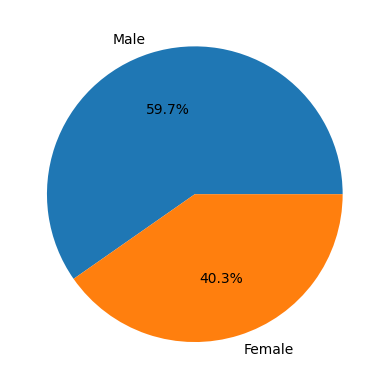

In [ ]:
#What is the gender distribution within the workforce?

plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.1f%%');

<Figure size 1400x1000 with 0 Axes>

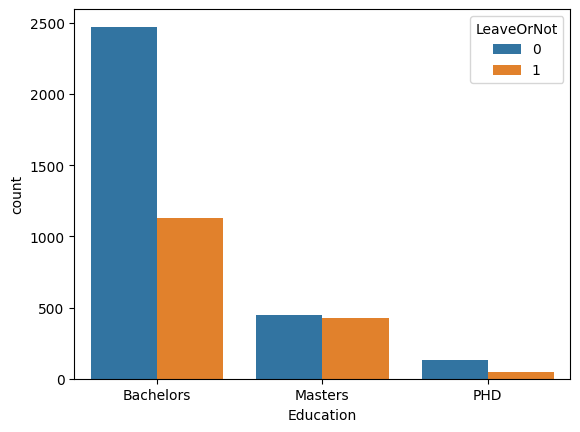

<Figure size 1400x1000 with 0 Axes>

In [ ]:
#Is there any pattern in leave-taking behavior among employees?

sns.countplot(x='Education',hue='LeaveOrNot',data=df)
plt.figure(figsize=(14,10))

<Figure size 1400x1000 with 0 Axes>

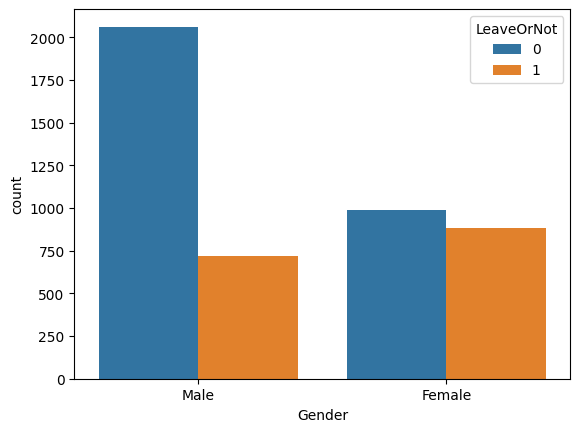

<Figure size 1400x1000 with 0 Axes>

In [ ]:
#female are majority on leave than men, despite less number than men.

sns.countplot(x='Gender',hue='LeaveOrNot',data=df)
plt.figure(figsize=(14,10))

Correlation between features

In [ ]:
df.corr().style.background_gradient('Reds')

<ipython-input-18-6c2e1bc62b5b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient('Reds')


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000


<ipython-input-19-9048c5330ab1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True);


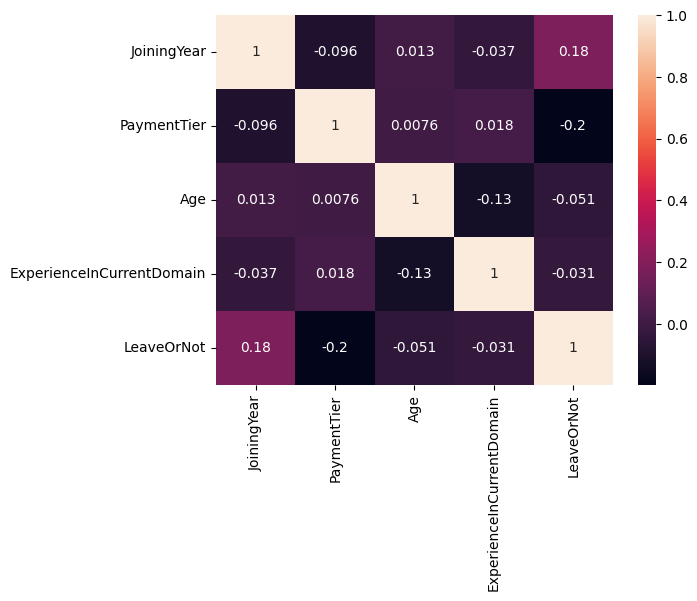

In [ ]:
#heatmap of corr()
sns.heatmap(df.corr(), annot = True);

In [ ]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])

df['Education']

0       0
1       0
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: Education, Length: 4653, dtype: int64

In [ ]:
df['Gender'] = le.fit_transform(df['Gender'])

df['City'] = le.fit_transform(df['City'])

df['EverBenched'] = le.fit_transform(df['EverBenched'])
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


Splitting data

In [ ]:
target = [ 'LeaveOrNot']
X =  df.drop(columns=target)
y = df[target]

In [ ]:
X.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,1,0,0
1,0,2013,2,1,28,0,0,3
2,0,2014,1,3,38,0,0,2
3,1,2016,0,3,27,1,0,5
4,1,2017,2,3,24,1,1,2


In [ ]:
y.head()

,LeaveOrNot
0,0
1,1
2,0
3,1
4,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.score(x_train, y_train)

0.7150752225974824

In [ ]:
model.score(x_test,y_test)

0.7256446991404012

Performance Metrics

In [ ]:
#confusion matrics
cm = confusion_matrix(y_test, y_pred)
cm

array([[836,  84],
       [299, 177]])

In [ ]:
y_test.value_counts()

LeaveOrNot
0             920
1             476
dtype: int64

In [ ]:
#precision score
precision_score(y_test,y_pred)

0.6781609195402298

In [ ]:
#recall score
recall_score(y_test,y_pred)

0.37184873949579833

In [ ]:
#model accuracy
accuracy_score(y_test,y_pred)

0.7256446991404012

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.81       920
           1       0.68      0.37      0.48       476

    accuracy                           0.73      1396
   macro avg       0.71      0.64      0.65      1396
weighted avg       0.72      0.73      0.70      1396



Observations:
1. The dataset appears to have a class imbalance. Class 0 has a higher support (920 instances) compared to class 1 (476 instances).
2. Precision: The model has higher precision for class 0 (0.74) compared to class 1 (0.68). For class 0, 74% of the predictions for "not leaving" were correct, and for class 1, 68% of the predictions for "leaving" were correct.
3. F1 score: The F1-score for class 0 (0.81) is higher than that for class 1 (0.48).

Accuracy: The overall accuracy of the model is 0.73. Accuracy measures the overall proportion of correctly predicted instances.The model has an accuracy of 73%, which means that 73% of the predictions across both classes are correct.

```

```

